# Jack's CMSE201 Cheatsheet

To be used in conjunction with the bootcamps and other class resources. Some of the topics are explained a bit more in-depth for those who want a deeper understanding of how to get the most out of Python.

**This project frequently undergoes updates.** Updated versions can always be found [here](https://github.com/jacknuge28/Projects/blob/main/Cheatsheet.ipynb) on GitHub.

<a id='top'></a>
## Table of Contents:
1. [Finding Resources Online](#online)
2. [Loops](#Loops)<br>
    a. For Loops<br>
    b. While Loops<br>
    c. The Nested For Loop
3. [Dictionaries (and some more on Lists)](#diction)<br>
    a. The Basics<br>
    b. More Complex Structures
4. [If Statements](#if)<br>
    a. The Basic `if-else` statement<br>
    b. The `elif` statement
5. [Functions](#func)<br>
    a. The Basic Function<br>
    b. Default Parameters
6. [Matplotlib](#plot)<br>
    a. What Is A "Good" Plot<br>
    b. Other Optional Plotting Features<br>
    c. The Subplot<br>
    d. Which Graph To Use?
7. [NumPy](#numpy)<br>
    a. `loadtxt()`<br>
    b. Arrays (1-D and 2-D)
8. [Masking](#mask)<br>
    a. NumPy <br>
    b. Pandas
9. [Pandas](#pandas)<br>
    a. Helpful Functions<br>
    b. My Steps to Analysis
10. [Math Heavy Functions](#mathheavy)<br>
    a. `curve_fit()`<br>
    b. `solve_ivp()`

In [5]:
# General imports I use in 90% of my notebooks
import numpy as np
import math 
import pandas as pd
import matplotlib.pyplot as plt

# More specific one-off type imports.
from scipy.optimize import curve_fit
from scipy.integrate import solve_ivp

<a id='online'></a>
## 1. Finding Resources Online [(To Top)](#top)
Much of what we do in class **will require Googling**. It isn't expected that anyone remembers every single error message or function parameter order for every Python function out there! 

Searching up code snippets and using them in your own work is fine (just put the link to the website you found this at in a comment in that cell). Likewise, finding datasets online is also okay, just give credit and cite your sources!

The main thing for when we use online resources: **make sure you know what is going on**. We can all just copy and paste code from the internet but if you can't explain what that code does, first off that looks real bad to your graders, but also if you run into bugs down the line you won't know how/where the issue occurred!

<a id='Loops'></a>
## 2. Loop Types [(To Top)](#top)
The two main types of loops we use are **for loops** and **while loops**.

A for loop is generally used when **we know how many times we want the loop to run**. 
A while loop is used when **we know what condition we want to stop at**. For the most part, I prefer to use for loops, but that's not to say while loops don't have their purpose!

It is worth noting that *any loop can be written as a for loop*.

### 2.1 For Loops
A more general case of loop, the for loop can be further broken into two main types of for loops:
1. **Loop by Index**
2. **Loop by Value**

Loop by value is generally a simpler representation of a loop. If I have a list of values (or any container-like object), loop by value will **just** loop over that list of values. An example is given below.

In [45]:
# Loop by value
list_of_vals = ['a', 'b', 'c', 'd']

for val in list_of_vals:
    print(val)

a
b
c
d


We can see that **looping by value** will show us the contents of the list. Simple, but not necessarily the easiest to work with when we get into more complex problems. 

What if I had two lists and wanted to print out the second value from each list? Looping by value won't work here because looping by value shows us **what** is in a list, but not **where** it is. If we want to access a certain value in a list, we need to use **looping by index**.

Looping by index is very similar to looping by index, but requires a slightly more specific loop set-up. An example is given below.

In [46]:
# Loop by index
list_of_vals = ['a', 'b', 'c', 'd']

for index in range(len(list_of_vals)):
    print(list_of_vals[index])

a
b
c
d


We see that both the loop examples above give us the same values, so let's break down the loop by index code a bit more:

`for index in range(len(list_name)):`

`index`: The looping variable keeping track of the index we are at.

`range(stop)`: A Python function that gives us a sequence of numbers. By default this will start at 0 and count upwards by 1 until reaching the number passed into the function. This is worth noting that it will count from 0 **up until** the stopping number, so if I wanted the numbers 0 through 5, I would call `range(6)`.

`len(list_name)`: A Python function that returns an integer of how many items are in the list (or container-like object) that is passed in.

By combining the `range()` and `len(list_name)` functions, we can set up our loop to count how many items we have in a list, as shown below. Remeber, in Python we start counting from 0, so a list of four items will be counted as "0, 1, 2, 3".

In [47]:
list_of_vals = ['a', 'b', 'c', 'd']

for index in range(len(list_of_vals)):
    print(index)

0
1
2
3


Now that we have the **number of elements in our list**, we can work backwards and figure out the answer to questions such as "What is the second element in our list?" (Remember, second element in Python will be the element at index 1).

In [48]:
list_of_vals[1]

'b'

The element at index 1 is, in fact, the second element of our list! 

Now let's put all of the pieces together. With looping by index, we can then access the list at the element like so:

In [49]:
list_of_vals = ['a', 'b', 'c', 'd']

for index in range(len(list_of_vals)):
    print(list_of_vals[index])

a
b
c
d


Looping by index is especially helpful when you have multiple lists, or just want certain elements from your list. Some examples are given below.

In [9]:
# Print one element of list_of_vals, then one element of list_of_nums, repeat for all values.
list_of_vals = ['a', 'b', 'c', 'd']
list_of_nums = [10, 20, 30, 40]

for index in range(len(list_of_vals)):
    print(list_of_vals[index])
    print(list_of_nums[index])

a
10
b
20
c
30
d
40


In [11]:
# Print the second value from each list.
list_of_vals = ['a', 'b', 'c', 'd']
list_of_nums = [10, 20, 30, 40]

index = 1
print(list_of_vals[index])
print(list_of_nums[index])

b
20


### 2.2 While Loops
Hopefully a slightly less complex loop to comprehend, the while loop will execute while a given condition is true.

The core components of the while loop itself is just the `while <condition>:`. Until that given condition is no longer true, the loop will run. 

The while loop does have some additional intricacies compared to the for loop. While loops can run into the issue of an **infinite loop**, where the condition is always true. In the following loop, if the `x += 1` line was not present, we would see the code cell would run forever (Feel free to delete that line and run the cell. Just make sure to STOP the cell from the Jupyter menus from Kernel -> Interrupt). This can be less obvious if the code cell in question has no print statement.

In [14]:
x = 0
while x < 5:
    print(x)
    x += 1

0
1
2
3
4


### 2.3 The Nested For Loop
A nested for loop is simply one for loop inside of another for loop (can be infinitely chained).

How this works is that the outer loop is triggered once, then the entirety of the inner loop. After the inner loop is completed we wrap back around to the outer loop's second trigger, execute the inner loop, and repeat until the outer loop is finished.

One thing to note is **we need to use different iterating variables for both loops**. If my first loop is written as `for i in ...` then my second loop **should not use `i` as a variable name**. This will cause a lot of headache with your loops and, unless you very much know what you're doing and the task at hand calls for it, should be avoided 99% of the time. 

An example structure is given below. Note how `i` remains the same until we have finished printing every `j`, then `i` is updated on the next pass of the loop:

In [18]:
for i in range(3):
    for j in ['a', 'b', 'c']:
        print(i, j)
    print()

0 a
0 b
0 c

1 a
1 b
1 c

2 a
2 b
2 c



<a id='diction'></a>
# 3. Dictionaries (and a little more of Lists) [(To Top)](#top)

### 3.1 The Basics 
Dictionaries are a more complex data structure as compared to a list. While lists are set up with values separated by commas like:

`[1,2,3]`

Dictionaries are set up with key-value pairings like:

`{key: value}`

In [4]:
list_example = [1,2,3,4]
dict_example= {'first': 1, 'second': 2, 'third': 3, 'fourth': 4}

To access the values of items in a dictionary, you need to use the key as an index. We can use a variant of the looping by index strategy above to access the key:

In [5]:
for key in dict_example:
    print(key)

first
second
third
fourth


And then use the key as an index like so:

In [6]:
for key in dict_example:
    print(dict_example[key])

1
2
3
4


### 3.2 More complex structures
Lists can hold single values in each element, but they can also hold other lists! The list-of-lists structure is fairly common, and knowing how to loop over them can be extremely helpful.


In [15]:
# Rows of a matrix
list_a = [[1,2,3],
          [4,5,6],
          [7,8,9]]
for i in range(len(list_a)):
    print(list_a[i])
    
# The same loop but with looping by value.

#    for i in list_a:
#        print(i)   


[1, 2, 3]
[4, 5, 6]
[7, 8, 9]


'\nfor i in list_a:\n    print(i)   \n'

We can see here that, by looping over `list_a`'s values like normal, we get the **rows** of the matrix. To loop over each element, like to print the numbers 1 through 9 in order, we will need to use a **nested for loop** (Section 1.3).

In [14]:
list_a = [[1,2,3],
          [4,5,6],
          [7,8,9]]
# Row
for i in range(len(list_a)):
    row = list_a[i]
    # Column of Row
    for j in range(len(row)):
        print(row[j])

1
2
3
4
5
6
7
8
9


<a id='if'></a>
# 4. If Statements [(To Top)](#top)

### 4.1 Basic `if-else` Statement
The `if` statement can be thought of logically as `if True, then ...`. If the condition after `if` is True, *then* we do whatever is after the if statement. 

If statements generally include a general `else` statement as well, to be used for when the `if` statement is not True.

In [23]:
for i in range(6):
    if i == 3:
        print(i, "Three!")
    else:
        print(i, "Not Three!")

0 Not Three!
1 Not Three!
2 Not Three!
3 Three!
4 Not Three!
5 Not Three!


### 4.2 The `elif` Statement

We see above that we only have two conditions, an `if` and an `else`. But what if we wanted to check multiple conditions? What if in the above cell we also wanted to check if the number was a 2 without adding another if statement?

This is where the `elif` (else-if) comes into play. `elif` allows us to effectively check another specific condition after the `if` statement, but avoid the "catch-all" statement that is the `else`.

In [22]:
for i in range(6):
    if i == 3:
        print(i, "Three!")
    elif i == 4:
        print(i, "Four!")
    else:
        print(i, "Not Three or Four!")

0 Not Three or Four!
1 Not Three or Four!
2 Not Three or Four!
3 Three!
4 Four!
5 Not Three or Four!


<a id='func'></a>
# 5. Functions [(To Top)](#top)

### 5.1 The Basic Function
Functions are great for repeated tasks, and can even be used between notebooks! These help for the readability of your code, making it so there's less copy-pasting and it's easier to see what is going on inside your code. The main things a function needs are a **name** and, if any, the **parameters**, or arguments, it needs to run.

**The order of the parameters matters**! The order you define them in the function defintion is the same order you need to pass the variables in when calling your function. If you don't do this properly your code may still run but your output will not be what you want!

If you want to use the output of a function again later, you will need a **return** function as well, though sometimes having a function `print` things is all you need.

Both a skeleton of a function and some working examples are given below:

In [32]:
# Basic structure of a function
def func_name(param_a, param_b):
    return 0
    
# Addition with a return
def addition(a, b):
    a_plus_b = a+b
    return a_plus_b

c = addition(1,2)
print(c)

3


In [33]:
# Addition without a return, but with a print
def addition_p(a, b):
    a_plus_b = a+b
    print(a_plus_b)
    
d = addition_p(1,2)
print(d)

3
None


In the first cell, we store the output of `addition` in the value `c`, then print that result. 

The second cell has two prints, the first one is within the function itself, so **any time the function is called, the print will happen**. But why does the second print statement print `None`? Shouldn't it print 3? 

By trying to store the results of `addition_p`, a function that **does not return its results**, Python did exactly that, it stored the results of the function in `d`, which is nothing! In the case of a function using a `print` with no `return`, you likely just need to call the function to see the information you want.

In [31]:
addition_p(1,2)

3


### 5.2 Default Parameters
You may notice some functions in class that have the same name but take different numbers of parameters. This is often due to "default parameters". 

In one of our favorite default Python functions `range()`, you may notice we always start from 0 and count up by 1. What if we wanted the numbers 100 through 105 from the range function?

The `range()` function is actually written with three base parameters, in the form `range(start=0, stop, step=1)`. The equal signs here mean "if no parameter is specified, **assume** this". Some examples of playing around with the parameters are shown below.

In [35]:
for i in range(5):
    print(i)

0
1
2
3
4


In [37]:
for i in range(100, 105):
    print(i)

100
101
102
103
104


In [39]:
for i in range(0, 10, 2):
    print(i)

0
2
4
6
8


In [42]:
for i in range(5, 0, -1):
    print(i)

5
4
3
2
1


Note that the `step` argument can be negative, which can be helpful in certain scenarios. 

To write a function using these default parameters, you just need to set an equal sign after the parameter name in the function definition, like so:

In [46]:
def addition(a, b=10):
    return (a+b)

addition(5)

15

Like before, the above function, when called, will add two numbers together. This time, if only one number is put in, it will default to adding 10 to that number.

<a id='plot'></a>
# 6. Matplotlib [(To Top)](#top)
A powerful plotting tool, `matplotlib` has far more capabilities than any one person will know. To that end, the [matplotlib documentation](https://matplotlib.org/) is insanely valuable.

Showing examples of plots is tough to do because there's so many approaches, so we can start with what a basic "well-labeled" plot might look like.

### 6.1 What is a "Good" Plot?

In [47]:
import matplotlib.pyplot as plt

In [68]:
x_ary = [np.random.randint(10) for x in range(10)]
x_ary

[2, 1, 1, 7, 2, 3, 0, 8, 6, 4]

In [69]:
y_ary = [np.random.randint(10) for y in range(10)]
y_ary

[3, 4, 6, 3, 0, 3, 3, 4, 8, 1]

Now we have two lists of ten randomly generated integers between 0 and 10. We can visualize this with a `scatter` plot. I chose a `.scatter()` over a regular `.plot()` because a `.plot()` graph tends to show that there is a relationship between one point and the previous one, but more on that later.

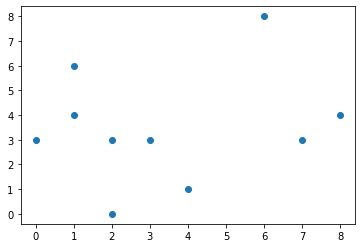

In [71]:
plt.scatter(x_ary, y_ary)

Great! We can see our data plotted in (x, y) coordinates, but what does this mean? If we were to give this data to some random individual, would this have any significance? I know that for this example there is truly no meaning to the variables, but labelling is a good habit to get into for any plot.

Text(0.5, 1.0, 'Scatter plot of X vs Y')

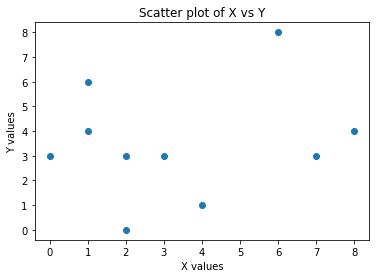

In [73]:
plt.scatter(x_ary, y_ary)
plt.xlabel("X values")
plt.ylabel("Y values")
plt.title("Scatter plot of X vs Y")

Even better, now (if your data had meaning), it would be properly communicated to whoever is viewing this and your data means a lot more than just a random scatter plot. 

### 6.2 Other Optional Plotting Features
Some common features we tend to use in `matplotlib` are things like changing the color, or style, of the plotted data. If we had two sets of data plotted on one figure, if they were all the same color it could be pretty confusing!

In [74]:
x_ary2 = [np.random.randint(10) for x in range(10)]
y_ary2 = [np.random.randint(10) for y in range(10)]

Text(0.5, 1.0, 'Scatter plot of X vs Y')

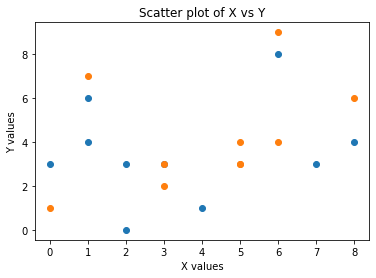

In [75]:
plt.scatter(x_ary, y_ary)
plt.scatter(x_ary2, y_ary2)
plt.xlabel("X values")
plt.ylabel("Y values")
plt.title("Scatter plot of X vs Y")

Sometimes, in cases like this, `matplotlib` is smart enough to automatically color the points for us. But if we want to do more, we can look up the documentation for [scatter](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.scatter.html) to see what else we can do with it. (The same goes for any type of plotting function, some functions may have specific arguments for that plotting type!)

The following shows how the graph is affected by these changes, for example with some of these changes we actually see that at the point (3,3), there is both a red and a blue point, something we didn't see previously. **This is not to say that there is a one-size-fits-all approach to plotting with additional features**. This will almost always be different depending on the outcome you want to emphasize, and the data you want to convey to the reader.

Text(0.5, 1.0, 'Scatter plot of X vs Y')

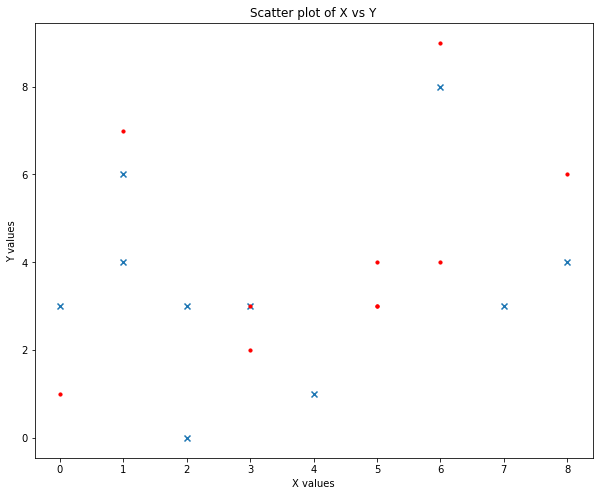

In [79]:
plt.figure(figsize=[10,8])
plt.scatter(x_ary, y_ary, marker='x')
plt.scatter(x_ary2, y_ary2, color='red', s = 10)
plt.xlabel("X values")
plt.ylabel("Y values")
plt.title("Scatter plot of X vs Y")

### 6.3 The Subplot
Rather than combine multiple datasets or lines onto one plot, we can make [subplots](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html), which is multiple plots on the same figure. The common uses for subplots compared to making multiple plots are readability and the ability to share common axes.

The standard procedure to creating subplots is <br>
`plt.subplot(rows, cols, position)`, where position is a number between 1 and `rows*cols`

The following example can be found in the Day 7 In-Class Assignment:

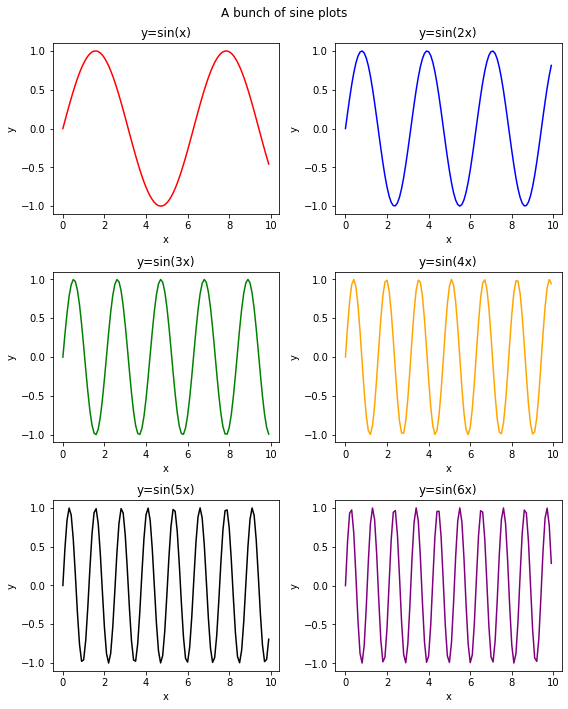

In [84]:
# initialize lists
x_list = []
y1 = []
y2 = []
y3 = []
y4 = []
y5 = []
y6 = []

# fill lists with values
for i in range(100):
    x = i*0.1
    x_list.append(x)
    y1.append(math.sin(x))
    y2.append(math.sin(2*x))
    y3.append(math.sin(3*x))
    y4.append(math.sin(4*x))
    y5.append(math.sin(5*x))
    y6.append(math.sin(6*x))

# makes a single figure that is 8 in wide and 10 in tall
plt.figure(figsize=(8,10))
plt.suptitle('A bunch of sine plots')  # title for the whole figure


# plot each curve on a separate subplot
plt.subplot(3,2,1) # Generate the 1st subplot of a 3x2 set of plots
plt.plot(x_list, y1, color='red') # plot points in the first subplot
plt.xlabel('x')
plt.ylabel('y')
plt.title('y=sin(x)')  # title for 1st subplot

plt.subplot(3,2,2) # Generate the 2nd subplot of a 3x2 set of plots
plt.plot(x_list, y2, color='blue') # plot points in the second subplot
plt.xlabel('x')
plt.ylabel('y')
plt.title('y=sin(2x)')

plt.subplot(3,2,3) # Generate the 3rd subplot of a 3x2 set of plots
plt.plot(x_list, y3, color='green') # plot points in the third subplot
plt.xlabel('x')
plt.ylabel('y')
plt.title('y=sin(3x)')

plt.subplot(3,2,4) # Generate the 4th subplot of a 3x2 set of plots
plt.plot(x_list, y4, color='orange') # plot points in the fourth subplot
plt.xlabel('x')
plt.ylabel('y')
plt.title('y=sin(4x)')

plt.subplot(3,2,5) # Generate the 5th subplot of a 3x2 set of plots
plt.plot(x_list, y5, color='black') # plot points in the fifth subplot
plt.xlabel('x')
plt.ylabel('y')
plt.title('y=sin(5x)')

plt.subplot(3,2,6) # Generate the 6th subplot of a 3x2 set of plots
plt.plot(x_list, y6, color='purple') # plot points in the sixth subplot
plt.xlabel('x')
plt.ylabel('y')
plt.title('y=sin(6x)')

plt.tight_layout()

### 6.4 Which graph to use?
This is slightly more anecdotal, but this is my personal thinking process for how I choose what type of graph to use when visualizing my data:

1. `plt.plot()`: Used when I want to visualize the relationship between two variables **over a continuous time period**.
2. `plt.scatter()`: Used when I want to visualize the relationship between two variables **with no direct time correlation**.
3. `plt.bar()`: Used when I want to compare the **quantity** of items from the same category (categorical).
4. `plt.pie()`: Not very frequently used for me besides in presentations, but is very nice to quickly demonstrate the breakdowns of your categories.
5. `plt.hist()`: Similar to the plt.bar(), but used to compare the **quantity** of numerical/continous data (continuous).

When using these, I always Google the documentation and have that handy so I can see what parameters are used and see some examples.

<a id='numpy'></a>
# 7. NumPy [(To Top)](#top)

In [2]:
import numpy as np

### 7.1 `loadtxt()`
The NumPy `loadtxt()` function can read in most types of files, so long as the proper parameters are passed in. The major difference between this and Pandas data loading is that `loadtxt()` unpacks data into NumPy arrays for our use. Unfortunately, this very generic file unpacking method means we often need to provide additional information as parameters to our function. In the [documentation](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html) for `loadtxt()`, we often use the parameters for `skiprows`, `delimeter`, and `encoding` depending on the type of file we wish to decode.

### 7.2 Arrays
Arrays are the main data structure used in NumPy. The array is very similar to a list, and they can sometimes be used in place of each other, but not always. 

Lists can store multiple different data types in them, just like a junk drawer in the house. The array is more specialized. It only holds one data type at a time. NumPy is smart enough to try and convert all data to a common ground, if strings and integers are both in an array they will all become strings.

Arrays have a few different ways to interact with them depending on how many dimensions they have. First, we look at the 1-Dimensional array.

### 7.2.1 1-D Arrays

In [4]:
a = np.arange(0,10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

With 1-D arrays, we can mostly index and slice them like we would a list, with the `ary[start:stop:step]` notation. The default assumption for this notation is `start = 0`, `stop = len(array)`, `step = 1`.

In [19]:
# First 3 values
print(a[:3])

# Last 3 values
print(a[-3:])

# Some elements from the middle
print(a[2:6])

# First half of the array
print(a[:5])

# Every second item
print(a[::2])

# Print the array in backwards order (useful to remember!)
print(a[::-1])

[0 1 2]
[7 8 9]
[2 3 4 5]
[0 1 2 3 4]
[0 2 4 6 8]
[9 8 7 6 5 4 3 2 1 0]


### 7.2.2 2-D Arrays
For a 2-D array, we can mostly apply the same principles, but twice!

If we iterated through a row (A 1-D array) with `ary[start:stop:step]`, we can iterate through a 2-D array with `ary[start_row:stop_row:step_row, start_col:stop_col:step_col]`.

Again, the default assumptions for both of these are the same as above. To indicate you want to select all rows/columns, place a `:` in the respective side of the comma (left side for rows, right side for columns).

In [20]:
b = np.array([[1,2,3],[4,5,6],[7,8,9]])
b

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [32]:
# Print the first row
print(b[0])

# Print the second column
print(b[:, 1])

# Print the middle element (5)
print(b[1,1])

# Print every other element of the third row
print(b[2,::2])

# Print a square array of the last two rows and columns
print(b[1:, 1:])

# Reverse the rows
print(b[::-1, :])

# Reverse the columns
print(b[:, ::-1])

[1 2 3]
[2 5 8]
5
[7 9]
[[5 6]
 [8 9]]
[[7 8 9]
 [4 5 6]
 [1 2 3]]
[[3 2 1]
 [6 5 4]
 [9 8 7]]


### 7.3 Helpful NumPy Functions to Remember
These are some fairly common NumPy functions that are worth remembering how to use (or Google!) in times of need.

1. `np.arange(start, stop, step)`: Returns an array of numbers from `start` to `stop` in increments/steps of `step`.
2. `np.linspace(start, stop, num)`: Returns an array of `num` evenly spaced numbers from `start` to `stop`.
3. `np.zeros(n)` and `np.ones(n)`: Returns an array of `n` zeros or ones, respectively.
4. `np.polyfit(x, y, deg)`: Returns an output of a degree `deg` polynomial that best fits the points (`x`,`y`) through minimization of squared error.
5. `np.nan`: Constant for a "not a number" value.

<a id='mask'></a>
# 8. Masking [(To Top)](#top)
A quick reminder on masking, as it can help us for both NumPy and Pandas. The steps to masking are:
1. Define the mask
2. Apply the mask to the data
3. Print our new, masked data!

An example in both NumPy and Pandas will be shown:

### 8.1 NumPy


In [35]:
values = np.array([1, 3, 7, 5, 2, 4])

values_mask = values > 2 # Step 1, define a mask

masked_data = values[values_mask] # Step 2, apply the mask

masked_data # Step 3, display our new data!

array([3, 7, 5, 4])

In [36]:
print(values_mask)

[False  True  True  True False  True]


As we can see here, we have selected only the values that satisfy our given condition, or our mask. The mask essentially loops through each value in the data, and checks if the value would return True or False for our given Boolean condition. The mask then stores that data as an array of Trues and Falses. When we pass the mask to our array, a new array is formed of **only** the values that returned True.

### 8.2 Pandas
The following imports the `Auto` dataset, a commonly used dataset in statistical learning.

In [16]:
auto = pd.read_csv('https://raw.githubusercontent.com/jacknuge28/Projects/main/Datasets/Auto.csv')
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [17]:
auto.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


The `Auto` dataset contains data for 397 cars. If we wanted to find only the cars that get at least 23 mpg, we can set up a mask!

In [18]:
mpg_mask = auto['mpg'] > 23 # Step 1, define the mask
masked_auto = auto[mpg_mask] # Step 2, apply the mask
masked_auto # Step 3, print the new data!

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
14,24.0,4,113.0,95,2372,15.0,70,3,toyota corona mark ii
18,27.0,4,97.0,88,2130,14.5,70,3,datsun pl510
19,26.0,4,97.0,46,1835,20.5,70,2,volkswagen 1131 deluxe sedan
20,25.0,4,110.0,87,2672,17.5,70,2,peugeot 504
21,24.0,4,107.0,90,2430,14.5,70,2,audi 100 ls
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


Notice now we only have 191 rows of data, but our index column still shows the initial position of the data. This is fine for now, the index doesn't always matter, but if you want to fix this you can run the following line:

In [21]:
masked_auto = masked_auto.reset_index()
masked_auto.head()

,level_0,index,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,0,14,24.0,4,113.0,95,2372,15.0,70,3,toyota corona mark ii
1,1,18,27.0,4,97.0,88,2130,14.5,70,3,datsun pl510
2,2,19,26.0,4,97.0,46,1835,20.5,70,2,volkswagen 1131 deluxe sedan
3,3,20,25.0,4,110.0,87,2672,17.5,70,2,peugeot 504
4,4,21,24.0,4,107.0,90,2430,14.5,70,2,audi 100 ls


The only tricky thing to keep in mind for masking on Pandas DataFrames is making sure you mask on a specific column. If you try to mask on the entire DataFrame, you may run into errors!

<a id='pandas'></a>
# 9. Pandas [(To Top)](#top)
The bread and butter of data analysis in Python. Some useful references to working with Pandas are:
1. [The 10-Minute Pandas Tutorial](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html)
2. The [Pandas Website](https://pandas.pydata.org/)

There are far too many topics in Pandas to cover here, so I'll do my best to cover some important/common functions, and a walkthrough of how I approach data analysis with Pandas.

### 9.1 Common Pandas Functions
These are really basic overviews of what the functions can be used for. To customize them more, Google the documentation for additional parameters.

1. `pd.read_csv()`: The common function we use to read .csv data. This returns a Pandas `DataFrame`, a nicely structured object in Python that looks like a spreadsheet! (There are other functions such as `read_json()` and `read_excel()` for different datatypes).
2. `df.head(n)`: Displays the first `n` rows of data from `df`.
3. `df.tail(n)`: Displays the last `n` rows of data from `df`.
4. `df.describe()`: Displays summary statistics for `df`
5. `df['column_name']`: Displays a DataFrame of a single column from your data.
6. `df.index = df['column_name']`: A quick method of using a column's values as your index rather than the default numbering system.
7. `df.columns = []`: Renames the columns of `df` to the names passed into the list.
8. `df.iloc[row_idx, col_idx]`: Returns the value(s) at the given row, col. These can be ranges such as `df.iloc[1:3, :]` for all columns in rows 1 through 3. **Used to access data by its indices/position.**
9. `df.loc[row_name, col_name]`: Returns the value(s) at the given row, col. These can be ranges such as `df.loc['row_name1:row_name2, col_name1:col_name2]` **Used to access data by it's label/name.**
10. `df.dropna()`: Removes rows/columns that contain missing values.

### 9.2 My Steps for Analysis
A brief walkthrough of the first things I tend to do when looking at a new/unfamiliar dataset:
1. Load the data with the appropriate Pandas function.
2. Call `df.head()` and `df.describe()` to see what I'm working with.
3. Determine what I want to do with missing data, generally I choose to just drop these values from the data, but some people replace the missing value with a mean/median for that column.
4. Determine what I want to find out from this data (if there are no given questions).
5. From the questions I am given/come up with, create appropriate plots to determine a conclusion for the task (For example, if I was asked to show if there was a correlation between the mpg of a car and its weight, I would plot weight on the x-axis and mpg on the y-axis and see if there was any relationship).

Make sure you can explain your findings! Conclusions don't matter if you can't convey them to someone who hasn't poured over the data as much as you have.

**Example**

First we load in our data and call `.head()` to see what features, or columns, each entry has. We can see that each entry has 9 variables total.

In [22]:
auto = pd.read_csv('https://raw.githubusercontent.com/jacknuge28/Projects/main/Datasets/Auto.csv')
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


Now that we've broken down the data a bit, we can call `.describe()` to get more insight into each **numerical** variable (We can't find the mean of a category like `name`).

In [23]:
auto.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


Something we notice here is that `horsepower` doesn't show up! We can check to see the datatype of `horsepower` fairly easily.

In [25]:
auto.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

Here we can see that `horsepower` is, for some reason, of the type "object" rather than of "int" or "float", meaning something is likely wrong with the data, or it may contain things like a "?" in place of missing data. If you want to try your hand at cleaning the data, go for it! But for now, we'll just look at other columns.

If I wanted to see if there was a relationship between `weight` and `mpg`, I could plot a simple scatter plot of the two variables.

Text(0.5, 1.0, 'Weight vs MPG in Auto Dataset')

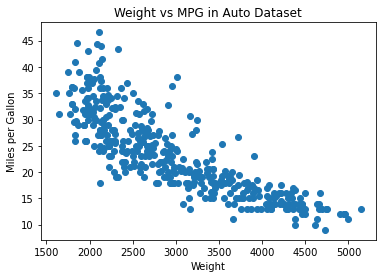

In [40]:
plt.scatter(auto['weight'], auto['mpg'])
plt.xlabel("Weight")
plt.ylabel("Miles per Gallon")
plt.title("Weight vs MPG in Auto Dataset")

We can see from this plot that there does seem to be a correlation where, as `weight` increases, `mpg` decreases. More can be done to find the actual slope of the best fit line, and you can always repeat this process for more pairs of variables, but this was a simple demonstration as to how I approach a foreign dataset!

<a id='mathheavy'></a>
# 10. Math Heavy Functions [(To Top)](#top)
Some of the tools we've used so far are a bit more involved with math, such as `curve_fit()` and `solve_ivp()`. This section will be used as a quick reminder as to how those functions work.

### 10.1 `curve_fit()`
SciPy's `curve_fit()` function takes in three main arguments: a function, the x_data, and the y_data. `curve_fit()` returns two values, an array of coefficient values for your line (we call this `popt`) and a covariance matrix (we call this `pcov`), but we can ignore the covariance matrix for the purposes of this class.

**Note**: Pay attention to the optional `p0` argument. This can be helpful if your `popt` array is returning all ones when that clearly doesn't match with your data.


#### Example

In [ ]:
from scipy.optimize import curve_fit

To start, we first need x and y data. (Taken from [SciPy's documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html))

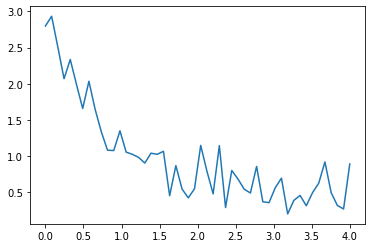

In [39]:
# a* e^(-b*x) + c
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

xdata = np.linspace(0, 4, 50)
y = func(xdata, 2.5, 1.3, 0.5)
rng = np.random.default_rng()
y_noise = 0.2 * rng.normal(size=xdata.size)
ydata = y + y_noise
plt.plot(xdata, ydata, '-', label='data')

Next, we want to fit our line for the parameters of `func()`. 

In [36]:
popt, pcov = curve_fit(func, xdata, ydata)
popt

array([2.49208233, 1.54618169, 0.57193708])

The array returned by `popt` will give us the predicted coefficient values for our line of best fit. Since `func()` takes, in order, `a`, `b`, `c`, the `popt` array is stored as `array([a, b, c])`. We can now index `popt` to get our variables and pass that back into `func()` to generate our line of best fit.

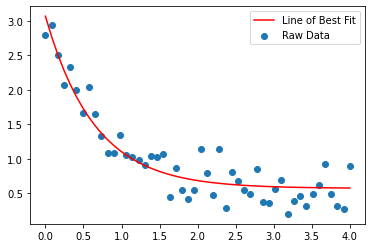

In [44]:
a = popt[0]
b = popt[1]
c = popt[2]

y_fit = func(xdata, a,b,c)
plt.scatter(xdata, ydata, label='Raw Data')
plt.plot(xdata, y_fit, c='r', label='Line of Best Fit')
plt.legend()

#### Method for Goodness of Fit
We now have a line of best fit for our randomly generated data! We can see that this line *looks* fine, but if we had multiple lines, how do we determine what the best model actually is? 

One method to determine goodness of fit is to use the "Sum of Squared Residuals" (also known as residual sum of squares). A residual is the distance an observed data point is from our line (the distance from the actual from the predicted). By squaring the residual value, we can eliminate the issue of a positive and negative residual cancelling each other out. The mathematical formula for the residual sum of squares (RSS) of a dataset of $n$ points looks like:

$$ RSS = \sum_{i=1}^{n} (y_i - f(x_i))^2$$

Where $y_i$ is our actual value and $f(x_i)$ is our predicted value. The smaller the RSS, the better the line fits our data. Between two lines of best fit, you want to **pick the one that minimizes RSS**. 

### 10.2 `solve_ivp()`

SciPy's `solve_ivp()` function takes in three main arguments: a function, a range of times in the form `[t_start, t_end]`, and the initial state. `solve_ivp()` returns two values, an array `y` of time points (`t`) and an array of points evaluated at `t`. We often refer to the initial state as `curr_vals` in classroom examples.

This function will solve an initial value problem for a system of ODEs.

#### Example
Taken from Day 17 PCA.

In [3]:
# Derivative function
def derivs(time,curr_vals):
    
    # Declare parameters
    g = -9.81 # m/s^2
    
    # Unpack the current values of the variables we wish to "update" from the curr_vals list
    h, v = curr_vals
    
    # Right-hand side of odes, which are used to computer the derivative
    dhdt = v
    dvdt = g
    
    return dhdt, dvdt

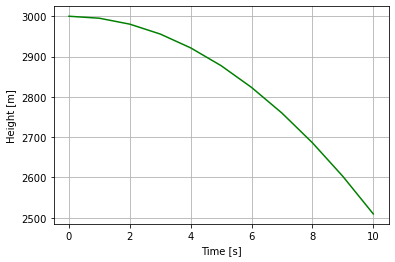

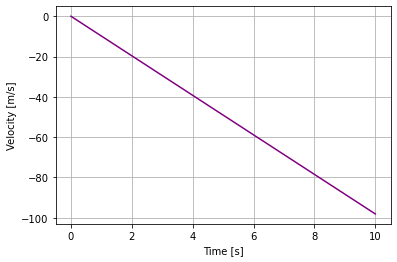

In [4]:
# Import commands
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import solve_ivp # This one is new to you!

# Declare Variables for initial conditions
h0 = 3000 # meters
v0 = 0 # m/s
tmax = 10 # seconds
dt = 1 # seconds

# Define the time array
time = np.arange(0, tmax + dt, dt)

# Store the initial values in a list
init = [h0, v0]

# Solve the odes with solve_ivp
sol = solve_ivp(derivs,(0,tmax),init,t_eval = time)
    
# Plot the results using the values stored in the solution variable, "sol"

# Plot the height using the "0" element from the solution
plt.figure(1)
plt.plot(time, sol.y[0,:],color="green")
plt.xlabel('Time [s]')
plt.ylabel('Height [m]')
plt.grid()

# Plot the velocity using the \"1\" element from the solution
plt.figure(2)
plt.plot(time, sol.y[1,:],color="purple")
plt.xlabel('Time [s]')
plt.ylabel('Velocity [m/s]')
plt.grid()